<a href="https://colab.research.google.com/github/M-PRERNA/MACHINE-LEARNING/blob/main/Prerna_Mishra_EDA_on_BankNifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT ALPHAA AI
*BankNifty Analysis* 

*~Prerna Mishra*

## EDA

### Importing Libraries

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np

### importing the dataset

In [34]:
data = pd.read_csv('data.csv')

In [35]:
data.head()

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0


Determining Data Types for each column

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  3448 non-null   object 
 1   open      3448 non-null   float64
 2   high      3448 non-null   float64
 3   low       3448 non-null   float64
 4   close     3448 non-null   float64
 5   volume    3448 non-null   float64
dtypes: float64(5), object(1)
memory usage: 161.8+ KB


checking for null values

In [37]:
# data['open'].isnull().sum()
# data['datetime'].isnull().sum()
# data['high'].isnull().sum()
# data['low'].isnull().sum()
# data['close'].isnull().sum()
data['volume'].isnull().sum()

0

no null values found!!!



---



### Some elementary transformations

In [38]:
data['year'] = pd.DatetimeIndex(data['datetime']).year 
data['month'] = pd.DatetimeIndex(data['datetime']).month

In [39]:
data.head()

,datetime,open,high,low,close,volume,year,month
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,2006,1
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,2006,1
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,2006,1
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,2006,1
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,2006,1


### Calculating returns for each day using formula:

``Month % Return = (Month Closing Price - Month Opening Price) / Month Opening Price``

---



In [40]:
data['return'] = (data['close']-data['open'])/data['open']

In [41]:
data.head()

,datetime,open,high,low,close,volume,year,month,return
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,2006,1,-0.002343
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,2006,1,0.015183
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,2006,1,0.016147
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,2006,1,0.009811
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,2006,1,-0.002444


Since, we want to work with year, month and return only. We create a separate data frame for reference.

In [42]:
d1 = data[['year', 'month', 'return']].copy()

In [43]:
d1.head()

,year,month,return
0,2006,1,-0.002343
1,2006,1,0.015183
2,2006,1,0.016147
3,2006,1,0.009811
4,2006,1,-0.002444


### Calculating monthly average return for each year

In [44]:
d1['avgret'] = d1.groupby(['year','month'])['return'].transform(np.mean)

In [45]:
d1.head()

,year,month,return,avgret
0,2006,1,-0.002343,0.000162
1,2006,1,0.015183,0.000162
2,2006,1,0.016147,0.000162
3,2006,1,0.009811,0.000162
4,2006,1,-0.002444,0.000162


Since there are duplicate monthly averages, which might hinder further analysis, we drop all the duplicates and keep only the last one.

### Removing Duplicates

In [46]:
d1 = d1.drop_duplicates(subset = ['year','month','avgret'], keep = 'last')

In [47]:
# also removing the column 'return' as we have to deal with average returns here

In [48]:
d1 = d1.drop('return',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [49]:
d1.head()

,year,month,avgret
19,2006,1,0.000162
38,2006,2,-0.000093
60,2006,3,-0.000525
78,2006,4,-0.001505
100,2006,5,-0.005277


### Creating the Heatmap

In [50]:
plot = d1.pivot('year','month','avgret')

using seaborn to plot the heatmap

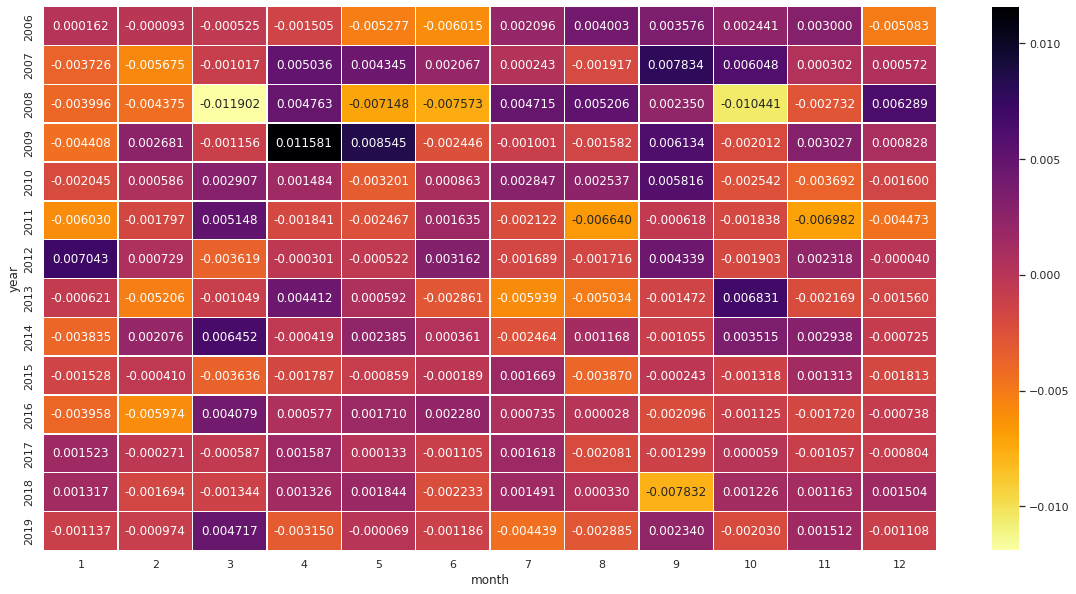

In [51]:
sns.heatmap(plot, annot=True, fmt="f", linewidths=.5, cmap="inferno_r")

The size of the plot is pretty small, setting it to 20 X 10

In [52]:
sns.set(rc = {'figure.figsize':(20,10)})

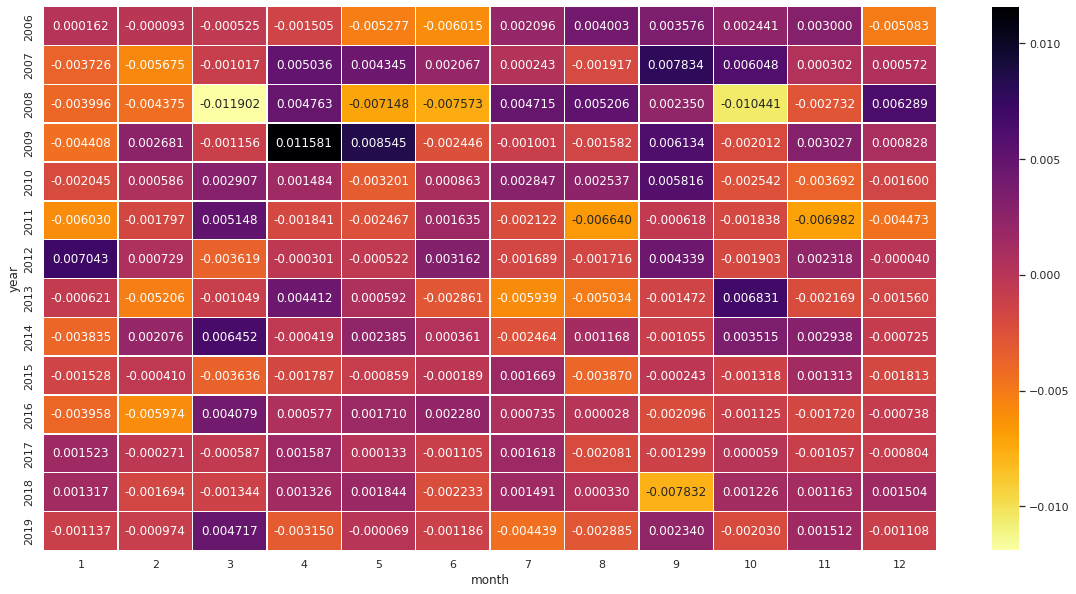

In [53]:
sns.heatmap(plot, annot=True, fmt="f", linewidths=.5, cmap="inferno_r")

The map is ready, but X-tick labels will change from month-numbers to month values

In [54]:
month_vals = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

[[Text(0.5, 0, 'Jan'),
  Text(1.5, 0, 'Feb'),
  Text(2.5, 0, 'Mar'),
  Text(3.5, 0, 'Apr'),
  Text(4.5, 0, 'May'),
  Text(5.5, 0, 'Jun'),
  Text(6.5, 0, 'Jul'),
  Text(7.5, 0, 'Aug'),
  Text(8.5, 0, 'Sep'),
  Text(9.5, 0, 'Oct'),
  Text(10.5, 0, 'Nov'),
  Text(11.5, 0, 'Dec')]]

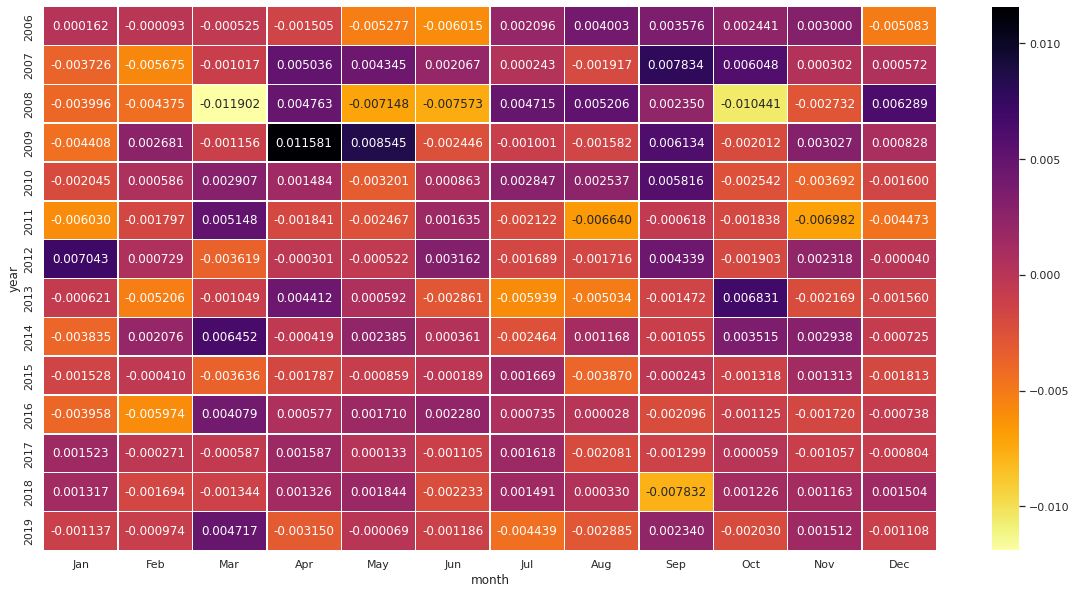

In [55]:
sns.heatmap(plot, annot=True, fmt="f", linewidths=.5, cmap="inferno_r").set(xticklabels = (month_vals))

In [56]:
d1.head()

,year,month,avgret
19,2006,1,0.000162
38,2006,2,-0.000093
60,2006,3,-0.000525
78,2006,4,-0.001505
100,2006,5,-0.005277


### EDA on the data thus obtained (that is d1)

Plotting a line graph to have a better view of the best performing month.

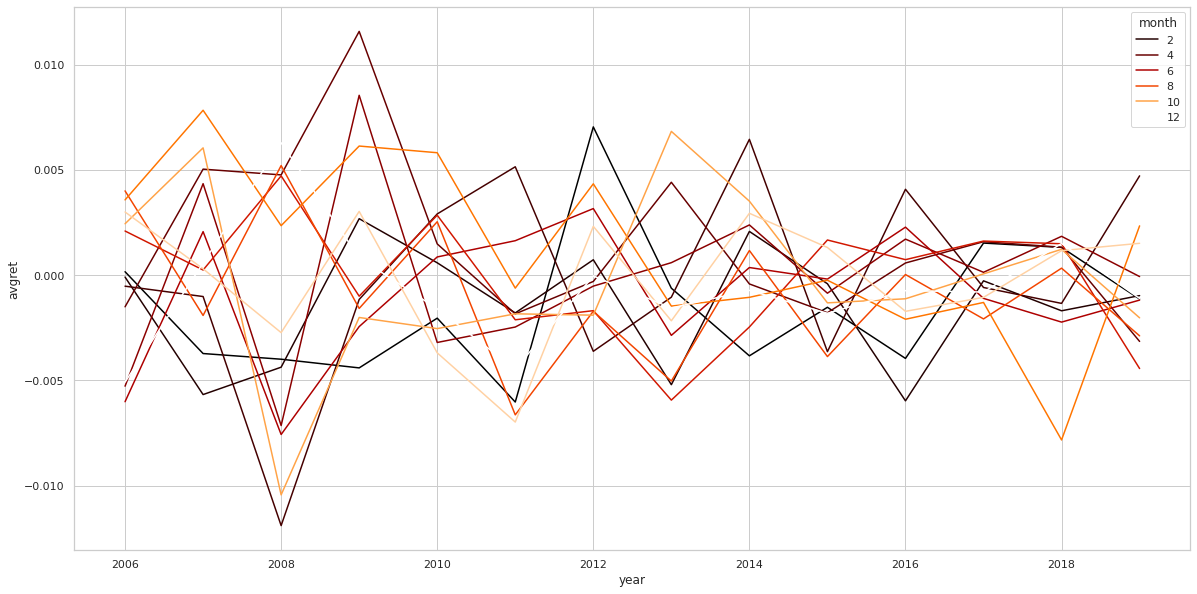

In [102]:
sns.set_style("whitegrid")
sns.lineplot(data = d1, x='year', y='avgret', hue="month", palette='gist_heat')

Line plot clearly shows how significantly, the average monthly returns have dropped from 2006 to 2019, with April 2009 being most positively correlated and February 2008 the least.